**Author:** Raoul Malm  

**Description:** 

This notebook demonstrates the future price prediction for different stocks using recurrent neural networks in tensorflow. Recurrent neural networks with basic, LSTM or GRU cells are implemented. 

**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Analyze data](#2-bullet)
3. [Manipulate data](#3-bullet)
4. [Model and validate data](#4-bullet)
5. [Predictions](#5-bullet)

**Reference:**  

[LSTM_Stock_prediction-20170507 by BenF](https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507/notebook)

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a> 

In [24]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));


/kaggle: ['lib', 'input', 'working']
/kaggle/working: ['__notebook_source__.ipynb']


Here is the first code snippet for the stock price prediction project. A few parameters are set, the necessary libraries are imported, and the current working directory and its parent directory are printed. In addition to numpy for array manipulation and numerical operations, pandas for data manipulation and analysis, math for mathematical functions, and sklearn and its preprocessing module for machine learning and data manipulation, datetime for handling dates and times, os for interacting with the operating system, matplotlib.pyplot for plotting, and tensorflow for neural network training and implementation are among the libraries imported.

In this case, the validation and testing percentages of the dataset are determined by two parameters. Afterwards, the code snippet prints the parent directory of the current working directory, lists its contents, and retrieves the current working directory.

This code snippet sets up the environment by importing necessary libraries, defining a few parameters, and showing the current working directory and parent directory contents. After loading and preprocessing the stock price dataset, recurrent neural networks will be implemented to predict stock prices.

# 2. Analyze data <a class="anchor" id="2-bullet"></a> 
- load stock prices from prices-split-adjusted.csv
- analyze data

In [25]:
# import all stock prices 
df = pd.read_csv("../input/prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['SNA', 'IVZ', 'CERN', 'NTAP', 'FOXA', 'EQR', 'NI', 'CHK', 'FDX', 'TMK']


In this code snippet, we will import a stock prices dataset in CSV format from the "../input/prices-split-adjusted.csv" path relative to the current working directory, and provide some basic information about it. Pandas' read_csv() function is used to read the dataset, with the first column set as the index. Imported stock price data are stored in the DataFrame, 'df'.

In df.info(), a summary of the dataset is provided, including the number of non-null values, column types, and memory usage, while df.head() displays the first five rows. Using the set() function and len(), we calculate the number of unique stock symbols in the dataset. Afterwards, a list of the 10 most unique stock symbols is retrieved, along with the total number of stocks.

In summary, this code snippet imports the stock prices dataset, summarizes and samples the data, and calculates the number of stocks in the dataset. Preprocessing and feature engineering are typically required to prepare data for recurrent neural network training.

In [26]:
df.tail()

symbol        open       close         low        high     volume
date                                                                        
2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   973800.0
2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001  1938100.0
2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002  1701200.0
2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000  1380900.0
2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   705100.0

In pandas, df.tail() returns the last five rows of a DataFrame named df. Using this function is particularly useful when working with large datasets, since it allows you to inspect the most recent entries quickly. It returns the last five rows by default, but you can specify a different number of rows to display by passing an integer argument to the function. Often, this function is used in data analysis tasks to verify that the data has been loaded and processed correctly, and to understand its structure and content.

In [27]:
df.describe()

open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%        75.120003      75.139999      74.400002      75.849998   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08

The code df.describe() generates a statistical summary of the DataFrame object named df using a pandas function call. This function provides a summary that includes the following statistics by default: count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum. Data analysis tasks often use describe() to gain insights into the distribution, central tendency, and dispersion of the data. In addition, it helps identify potential issues like missing values, outliers, or errors in data entry. Before proceeding with more advanced analysis or modeling, you may want to use this function call during the exploratory data analysis stage.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


The pandas function df.info() provides a concise summary of the DataFrame object named df. This function displays essential information about the dataset, including the number of rows and columns, column names, non-null values, and data types. In addition, it reports the memory usage of the DataFrame, which can be helpful when dealing with large datasets. A quick overview of the dataset structure, identification of missing values, and understanding the data types of each column can be obtained using the info() function during the initial stages of data analysis. If further analysis or modeling is required, this information is useful for identifying any data cleaning or preprocessing steps that need to be performed.

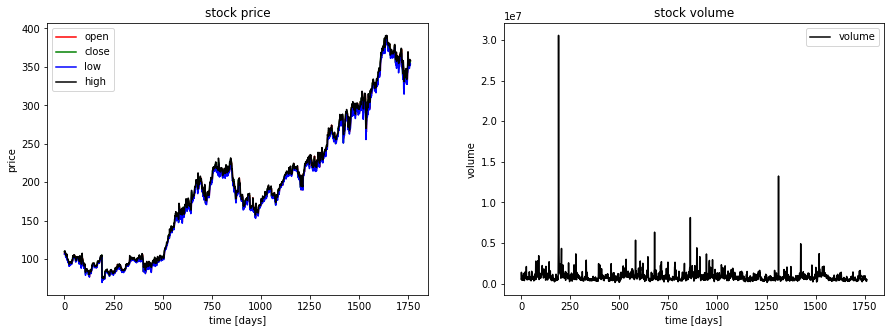

In [29]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

Using this code snippet, you can visualize the stock price and trading volume for a specific stock symbol, 'EQIX', over time. The width and height of a new figure are specified. This subplot displays stock prices by plotting the 'open', 'close', 'low', and 'high' price values for EQIX. For this subplot, the title, axis labels, and legend are set.

Stock volume is the focus of the second subplot. The title, labels, and legend are set in the same way as in the first subplot for the 'EQIX' stock. This figure shows the stock prices of 'EQIX' on the left and the trading volume of 'EQIX' on the right. Using this visualization, you can understand the stock's price and volume trends over time, which is useful for feature engineering and data preprocessing.

# 3. Manipulate data <a class="anchor" id="3-bullet"></a> 
- choose a specific stock
- drop feature: volume
- normalize stock data
- create train, validation and test data sets

In [30]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)


df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


This code snippet defines two functions, normalize_data() and load_data(), which prepare data for training, validation, and testing by applying them to a specific stock ('EQIX'). Normalize_data() takes a DataFrame as input and applies min-max normalization to the 'open', 'high', 'low', and 'close' columns, scaling the data to a specific range (default is 0 to 1) to speed up convergence of the neural network. By fitting the scaler to the data and transforming it, it creates a MinMaxScaler object from the scikit-learn library.

Load_data() returns the training, validation, and testing sets based on a DataFrame and a sequence length. The first step is to convert the data to a numpy array, create sequences of the specified length, and then split the data into train, validation, and test sets. The DataFrame is filtered in the data preparation section to only include rows with the EQIX symbol, and the 'symbol' and 'volume' columns are removed. Using the filtered DataFrame, the load_data() function is called with the normalized stock data and a sequence length of 20 to create the train, validation, and test sets.

In order to confirm that the data has been processed correctly, the shapes of the generated x and y values for the train, validation, and test sets are printed.

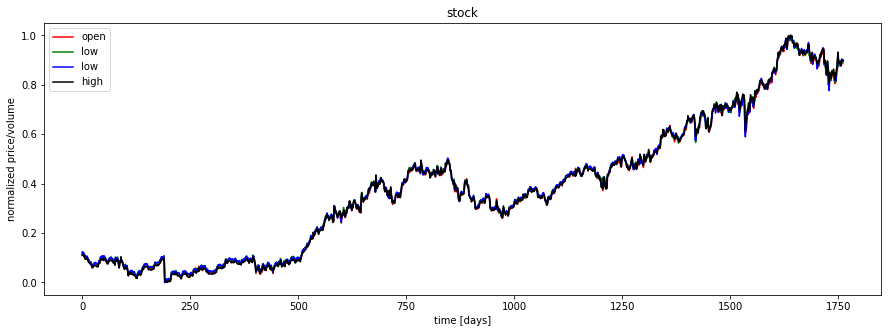

In [31]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

This code snippet displays the normalized stock prices (open, close, low, and high) for the selected stock ('EQIX') over time. An initial matplotlib figure is created with a width (15) and height (5) in inches. Normalized open, close, low, and high prices of the stock data are plotted in red, green, blue, and black, respectively. 'Stock' is the title of the chart; the x-axis is 'time [days]', and the y-axis is 'normalized price/volume'. The legend's position is determined automatically by matplotlib, which adds it to the plot. The plot is displayed at the end.

The visualization illustrates the normalized stock prices for 'EQIX' over time, helping to understand trends in prices and verifying that the normalization process was applied correctly. Using this visualization, you can understand data patterns before training your recurrent neural network.

# 4. Model and validate data <a class="anchor" id="4-bullet"></a> 
- RNNs with basic, LSTM, GRU cells


In [32]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    

0.00 epochs: MSE train/valid = 0.640511/1.348576
4.99 epochs: MSE train/valid = 0.000206/0.001065
9.97 epochs: MSE train/valid = 0.000156/0.000891
14.96 epochs: MSE train/valid = 0.000139/0.000487
19.94 epochs: MSE train/valid = 0.000175/0.000484
24.93 epochs: MSE train/valid = 0.000107/0.000466
29.91 epochs: MSE train/valid = 0.000099/0.000405
34.90 epochs: MSE train/valid = 0.000103/0.000326
39.89 epochs: MSE train/valid = 0.000094/0.000309
44.87 epochs: MSE train/valid = 0.000085/0.000311
49.86 epochs: MSE train/valid = 0.000077/0.000270
54.84 epochs: MSE train/valid = 0.000085/0.000378
59.83 epochs: MSE train/valid = 0.000091/0.000363
64.81 epochs: MSE train/valid = 0.000085/0.000413
69.80 epochs: MSE train/valid = 0.000075/0.000270
74.78 epochs: MSE train/valid = 0.000069/0.000287
79.77 epochs: MSE train/valid = 0.000079/0.000366
84.76 epochs: MSE train/valid = 0.000063/0.000225
89.74 epochs: MSE train/valid = 0.000067/0.000235
94.73 epochs: MSE train/valid = 0.000064/0.000193
99.

With this code snippet, we define and train a recurrent neural network (RNN) using TensorFlow and Basic RNN cells to predict future stock prices. This function initializes variables that control the generation of training batches, keeps track of the current index in the training set, and shuffles the data after each epoch. RNN model and training parameters are set, including architecture, learning rate, batch size, and epochs. In order to avoid interference with previous runs, the default TensorFlow graph is reset.

The input and output tensors are placeholders, and the RNN cells are created, with options for different types of cells (Basic RNN, LSTM, LSTM with peephole connections, and GRU). This case uses Basic RNN cells. Multilayer RNN cells are created by stacking previously defined cells, and the RNN is constructed using tf.nn.dynamic_rnn(). To generate the final outputs, only the last output from each sequence is selected from the reshaped RNN outputs. In order to minimize loss, an Adam optimizer and training operation are created based on the mean squared error (MSE) between the predicted and true outputs.

TensorFlow sessions are created, variables are initialized, and the RNN is trained through the specified number of epochs. Using the training operation, a batch of data is generated and fed into the RNN for each iteration. Every five epochs, the code prints the MSE values for the training and validation sets. By running the RNN with the respective input data, predictions are generated for the training sets, validation sets, and test sets. A model's performance can be optimized by experimenting with different types of RNN cells and adjusting various parameters.

# 5. Predictions <a class="anchor" id="5-bullet"></a> 

In [33]:
y_train.shape

(1394, 4)

correct sign prediction for close - open price for train/valid/test: 0.73/0.48/0.42


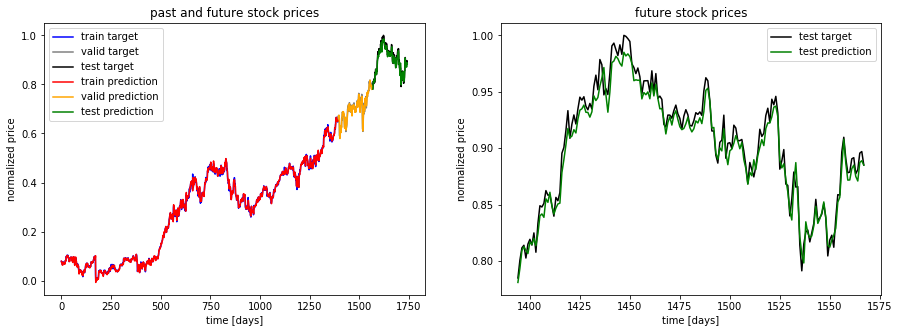

In [34]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))


Using the code snippet, prediction accuracy is calculated for the direction of price changes predicted by the trained RNN model. To plot the feature, it selects the feature to plot (the open prices in this case) and creates a plot with two subplots. Subplots 1 and 2 show train, validation, and test target values along with their respective predictions, while subplot 3 displays test target and prediction values. For each subplot, the actual and predicted values are plotted with different colors and labels. In both subplots, x-axis is labelled 'time [days]' and y-axis is labelled 'normalized price'. The first subplot is titled 'past and future stock prices'. In order to make it easier to distinguish between the different lines, legends have been added.

As part of the training, validation, and test sets, the code determines the accuracy of the predicted direction of the close price change (close - open) by checking if the predicted price change sign is the same as the actual price change sign, then dividing the total number of accurate predictions by the total number of samples. There is a printout of the accuracy values for the training, validation, and test sets. In this visualization, the actual and predicted stock prices are compared, while the calculated accuracy provides a quantitative assessment of the model's ability to predict price direction.